# Multi-table Datasets - ENRON Archive

## 1. Data import

Connect to the file 'assets/datasets/enron.db' using one of these methods:

- sqlite3 python package
- pandas.read_sql
- SQLite Manager Firefox extension

Take a look at the database and query the master table. How many Tables are there in the db?

> Answer:
There are 3 tables:
- MessageBase
- RecipientBase
- EmployeeBase

In [1]:
import sqlite3
conn = sqlite3.connect('../../assets/datasets/enron.db') 
c = conn.cursor()


In [5]:
print c.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
conn.commit()

[(u'MessageBase',), (u'RecipientBase',), (u'EmployeeBase',)]


Query the `sqlite_master` table to retrieve the schema of the `EmployeeBase` table.

1. What fields are there?
1. What's the type of each of them?

In [26]:
print c.execute('select sql from sqlite_master where type = "table" and name = "EmployeeBase"').fetchall()
print c.execute('select sql from sqlite_master where type = "table" and name = "RecipientBase"').fetchall()
print c.execute('select sql from sqlite_master where type = "table" and name = "MessageBase"').fetchall()
conn.commit()

[(u'CREATE TABLE EmployeeBase (\n                  [eid] INTEGER,\n  [name] TEXT,\n  [department] TEXT,\n  [longdepartment] TEXT,\n  [title] TEXT,\n  [gender] TEXT,\n  [seniority] TEXT\n                  \n                  )',)]
[(u'CREATE TABLE RecipientBase (\n    mid INTEGER,\n    rno INTEGER,\n    to_eid INTEGER,\n    \n    PRIMARY KEY(mid ASC, rno ASC)\n    FOREIGN KEY(mid) REFERENCES Message(mid)\n    FOREIGN KEY(to_eid) REFERENCES Employee(eid)\n)',)]
[(u'CREATE TABLE MessageBase (\n    mid INTEGER,\n    filename TEXT,\n    unix_time INTEGER,\n    subject TEXT,\n    from_eid INTEGER,\n    \n    PRIMARY KEY(mid ASC),\n    FOREIGN KEY(from_eid) REFERENCES Employee(eid)\n)',)]


In [28]:
c.execute("PRAGMA table_info('EmployeeBase')").fetchall()

[(0, u'eid', u'INTEGER', 0, None, 0),
 (1, u'name', u'TEXT', 0, None, 0),
 (2, u'department', u'TEXT', 0, None, 0),
 (3, u'longdepartment', u'TEXT', 0, None, 0),
 (4, u'title', u'TEXT', 0, None, 0),
 (5, u'gender', u'TEXT', 0, None, 0),
 (6, u'seniority', u'TEXT', 0, None, 0)]

In [24]:
c.execute("PRAGMA table_info('RecipientBase')").fetchall()

[(0, u'mid', u'INTEGER', 0, None, 1),
 (1, u'rno', u'INTEGER', 0, None, 2),
 (2, u'to_eid', u'INTEGER', 0, None, 0)]

In [25]:
c.execute("PRAGMA table_info('MessageBase')").fetchall()

[(0, u'mid', u'INTEGER', 0, None, 1),
 (1, u'filename', u'TEXT', 0, None, 0),
 (2, u'unix_time', u'INTEGER', 0, None, 0),
 (3, u'subject', u'TEXT', 0, None, 0),
 (4, u'from_eid', u'INTEGER', 0, None, 0)]

In [29]:
conn.commit()

1. Print the first 5 rows of EmployeeBase table
1. Print the first 5 rows of MessageBase table
1. Print the first 5 rows of RecipientBase table

**Hint**  use `SELECT` and `LIMIT`.

In [50]:
results =  c.execute("SELECT * FROM EmployeeBase limit 5").fetchall()
print "First 5 rows of EmployeeBase table :"
for x in results:
    print x
results = c.execute("SELECT * FROM MessageBase limit 5").fetchall()
print "First 5 rows of MessageBase table :"
for x in results:
    print x
results = c.execute("SELECT * FROM RecipientBase limit 5").fetchall()
print "First 5 rows of RecipientBase table : "
for x in results:
    print x

conn.commit()

First 5 rows of EmployeeBase table :
(1, u'John Arnold', u'Forestry', u'ENA Gas Financial', u'VP Trading', u'Male', u'Senior')
(2, u'Harry Arora', u'Forestry', u'ENA East Power', u'VP Trading', u'Male', u'Senior')
(3, u'Robert Badeer', u'Forestry', u'ENA West Power', u'Mgr Trading', u'Male', u'Junior')
(4, u'Susan Bailey', u'Legal', u'ENA Legal', u'Specialist Legal', u'Female', u'Junior')
(5, u'Eric Bass', u'Forestry', u'ENA Gas Texas', u'Trader', u'Male', u'Junior')
First 5 rows of MessageBase table :
(1, u'taylor-m/sent/11', 910930020, u'Cd$ CME letter', 138)
(2, u'taylor-m/sent/17', 911459940, u'Indemnification', 138)
(3, u'taylor-m/sent/18', 911463840, u'Re: Indemnification', 138)
(4, u'taylor-m/sent/23', 911874180, u'Re: Coral Energy, L.P.', 138)
(5, u'taylor-m/sent/27', 912396120, u'Bankruptcy Code revisions', 138)
First 5 rows of RecipientBase table : 
(1, 1, 59)
(2, 1, 15)
(3, 1, 15)
(4, 1, 109)
(4, 2, 49)


Import each of the 3 tables to a Pandas Dataframes

In [51]:
import pandas as pd
emp = pd.DataFrame(c.execute("SELECT * FROM EmployeeBase").fetchall())
emp.columns = ['eid','name','department','longdepartment','title','gender','seniority']

mes = pd.DataFrame(c.execute("SELECT * FROM MessageBase").fetchall())
mes.columns = ['mid','filename','unix_time','subject','from_eid']

rec = pd.DataFrame(c.execute("SELECT * FROM RecipientBase").fetchall())
rec.columns = ['mid','rno','to_eid']

conn.commit()

In [63]:
mes.head()

,mid,filename,unix_time,subject,from_eid
0,1,taylor-m/sent/11,910930020,Cd$ CME letter,138
1,2,taylor-m/sent/17,911459940,Indemnification,138
2,3,taylor-m/sent/18,911463840,Re: Indemnification,138
3,4,taylor-m/sent/23,911874180,"Re: Coral Energy, L.P.",138
4,5,taylor-m/sent/27,912396120,Bankruptcy Code revisions,138


## 2. Data Exploration

Use the 3 dataframes to answer the following questions:

1. How many employees are there in the company?
- How many messages are there in the database?
- Convert the timestamp column in the messages. When was the oldest message sent? And the newest?
- Some messages are sent to more than one recipient. Group the messages by message_id and count the number of recepients. Then look at the distribution of recepient numbers.
    - How many messages have only one recepient?
    - How many messages have >= 5 recepients?
    - What's the highest number of recepients?
    - Who sent the message with the highest number of recepients?
- Plot the distribution of recepient numbers using Bokeh.

In [125]:
print "1. Employees in the company : " ,len(emp)
print "2. Total number of messages : " ,len(mes)

1. Employees in the company :  156
2. Total number of messages :  21635


In [73]:
mes.unix_time = pd.to_datetime(mes.unix_time, unit='s')

Timestamp('2002-06-21 13:37:34')

In [230]:
print "3.a Oldest Message sent on : ", min(mes.unix_time)
print "3.b Newest Message sent on : ", max(mes.unix_time)

3.a Oldest Message sent on :  1998-11-13 04:07:00
3.b Newest Message sent on :  2002-06-21 13:37:34


In [229]:
# Group By for message ID
a = rec.groupby(['mid'])['rno'].count()

print "4.a. Number of messages with only 1 Recepient : " , len(a[a.values ==1])
print "4.b. Number of messages with >= 5 recepients : " , len(a[a.values >= 5])
print "4.c. Highest number of recepients : " , max(a)

rec[rec.rno == 57]['mid']
mes[mes.mid == 12116]['from_eid'].values
name = emp[emp.eid == 67]['name']
print "4.d. Message with highest number of recepient is sent by: ", name.values[0]


4.a. Number of messages with only 1 Recepient :  14985
4.b. Number of messages with >= 5 recepients :  1380
4.c. Highest number of recepients :  57
4.d. Message with highest number of recepient is sent by:  John J. Lavorato


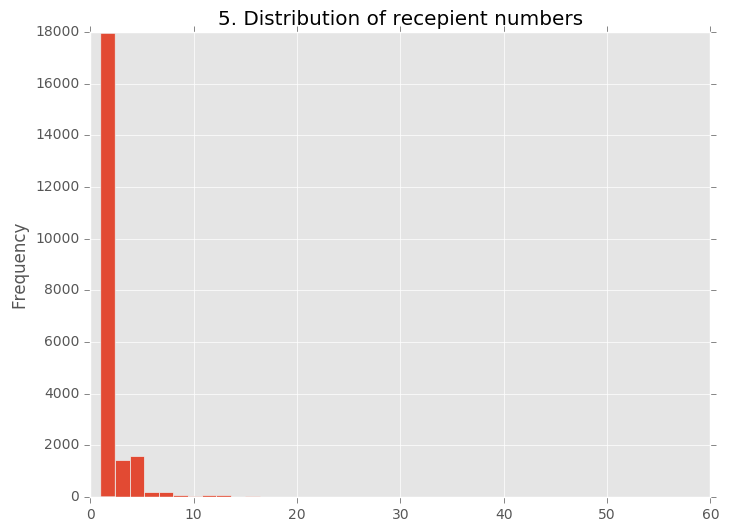

In [234]:
a.plot(kind='hist',figsize =(8,6),bins=40)
plt.title("5. Distribution of recepient numbers")
plt.show()

Rescale to investigate the tail of the curve

## 3. Data Merging

Use the pandas merge function to combine the information in the 3 dataframes to answer the following questions:

1. Are there more Men or Women employees?
- How is gender distributed across departments?
- Who is sending more emails? Men or Women?
- What's the average number of emails sent by each gender?
- Are there more Juniors or Seniors?
- Who is sending more emails? Juniors or Seniors?
- Which department is sending more emails? How does that relate with the number of employees in the department?
- Who are the top 3 senders of emails? (people who sent out the most emails)

In [243]:
print emp.groupby(['gender'])['eid'].count()
print "Men are more in number"

gender
Female     43
Male      113
Name: eid, dtype: int64
Men are more in number


In [246]:
pd.pivot_table(emp[['department','gender']], columns = ['gender'], index = ['department'], aggfunc = len)

gender,Female,Male
department,,
Forestry,10,50
Legal,13,12
Other,20,51


In [260]:
empmes = emp.merge(mes, how='inner', left_on ='eid', right_on = 'from_eid' )

print "3. Number of Emails sent by Gender : \n", empmes.groupby(['gender'])['eid'].count() 

3. Number of messages sent by Gender : 
gender
Female     8794
Male      12841
Name: eid, dtype: int64


In [281]:
print "Avg emails sent by males:", len(empmes[(empmes['gender'] == 'Male')])/float(len(emp[(emp['gender'] == 'Male')]))
print "Avg emails sent by females:", len(empmes[(empmes['gender'] == 'Female')])/float(len(emp[(emp['gender'] == 'Female')]))

Avg emails sent by males: 113.637168142
Avg emails sent by females: 204.511627907


In [283]:
emp.groupby(['seniority'])['eid'].count()

seniority
Junior    82
Senior    74
Name: eid, dtype: int64

In [285]:
print "6. Number of Emails sent by seniority : \n", empmes.groupby(['seniority'])['eid'].count() 

6. Number of Emails sent by seniority : 
seniority
Junior     9196
Senior    12439
Name: eid, dtype: int64


In [291]:
print "Number of emails by department: \n", empmes.department.value_counts()
print "Number of Employees by department: \n", emp.department.value_counts()

Number of emails by department: 
Legal       10396
Other        6852
Forestry     4387
Name: department, dtype: int64
Number of Employees by department: 
Other       71
Forestry    60
Legal       25
Name: department, dtype: int64


In [296]:
print "8: Top 3 Employees who send most Emails"
empmes.name.value_counts()[:3]

8: Top 3 Employees who send most Emails


Jeff Dasovich      1597
Tana Jones         1379
Sara Shackleton    1142
Name: name, dtype: int64

Answer the following questions regarding received messages:

- Who is receiving more emails? Men or Women?
- Who is receiving more emails? Juniors or Seniors?
- Which department is receiving more emails? How does that relate with the number of employees in the department?
- Who are the top 5 receivers of emails? (people who received the most emails)

In [303]:
allmerged = empmes.merge(rec, how='inner', on ='mid')

print len(allmerged)

allmerged.head()

38388


,eid,name,department,longdepartment,title,gender,seniority,mid,filename,unix_time,subject,from_eid,rno,to_eid
0,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior,1611,arnold-j/sent/379,2000-03-29 08:08:00,Re: Insurance Call Spread,1,1,42
1,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior,1615,arnold-j/sent/377,2000-03-29 11:22:00,New curve generation methodology,1,1,76
2,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior,1615,arnold-j/sent/377,2000-03-29 11:22:00,New curve generation methodology,1,2,67
3,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior,1615,arnold-j/sent/377,2000-03-29 11:22:00,New curve generation methodology,1,3,121
4,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior,1722,arnold-j/sent/365,2000-04-11 09:58:00,Option Analysis on NG Price Book,1,1,76


In [305]:

print "Number of mails recieved by gender : \n", allmerged.groupby(['gender'])['eid'].count()

Number of mails recieved by gender : 
gender
Female    15590
Male      22798
Name: eid, dtype: int64


In [307]:
print "Number of Emails recieved by seniority : \n", allmerged.groupby(['seniority'])['eid'].count() 

Number of Emails recieved by seniority : 
seniority
Junior    15898
Senior    22490
Name: eid, dtype: int64


In [309]:
print "Number of emails recieved by department: \n", allmerged.department.value_counts()
print "Number of Employees by department: \n", emp.department.value_counts()

Number of emails recieved by department: 
Legal       19292
Other       11984
Forestry     7112
Name: department, dtype: int64
Number of Employees by department: 
Other       71
Forestry    60
Legal       25
Name: department, dtype: int64


In [311]:
print "Top 5 Employees who received most Emails"
allmerged.name.value_counts()[:5]

Top 5 Employees who received most Emails


Jeff Dasovich       3844
Tana Jones          2858
James D. Steffes    1666
Sara Shackleton     1515
Mike Grigsby        1204
Name: name, dtype: int64

Which employees sent the most 'mass' emails?

In [371]:
pivot = pd.pivot_table(allmerged,index=["mid","name"], values=["rno"],
                       aggfunc=len).sort_values(by = 'rno', ascending = False)

In [387]:
c = pivot.groupby(level=1).first().sort_values(by = 'rno', ascending = False)
print "Top 10 Employees who sent most 'MASS' emails : \n", 
c.head(10)

Top 10 Employees who sent most 'MASS' emails : 


,rno
name,
John J. Lavorato,57
Kenneth Lay,52
Sally Beck,49
Monique Sanchez,24
Louise Kitchen,21
Susan Scott,21
Kam Keiser,20
Mary Hain,17
Susan M. Scott,16


Keep exploring the dataset, which other questions would you ask?

Work in pairs. Give each other a challenge and try to solve it.